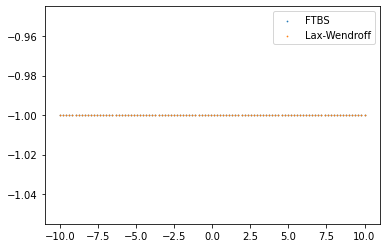

In [43]:
import numpy as np
import matplotlib.pyplot as plt
tend = 2
N = 100
dx = 1 / N
dt = 1 / (4 * N)  # <= 1/(2N)
c = 2 * dt / dx
x = np.linspace(-10, 10, N)
# Initial values:
u_0 = -np.ones(N) + 2 * (x>0)
u_FTBS = u_0
u_LW = u_0
num_solutions_FTBS = [u_FTBS]
num_solutions_LW = [u_LW]
# FTBS Matrix:
M_FTBS = np.diag((1 - c) * np.ones(N)) + np.diag(c * np.ones(N - 1), -1)
M_FTBS[0, 0] += c
for _ in range(int(tend / dt)):
    u_FTBS = M_FTBS @ u_FTBS
    num_solutions_FTBS.append(u_FTBS)
# Lax-Wendroff Matrix:
M_LW = np.diag((1 - c**2) * np.ones(N)) + np.diag(c*(c-1)/2 * np.ones(N - 1), 1) + np.diag(c*(c+1)/2 * np.ones(N - 1), -1)
M_LW[0, 0] += c*(c+1)/2
M_LW[-1, -1] += c*(c-1)/2
for _ in range(int(tend / dt)):
    u_LW = M_LW @ u_LW
    num_solutions_LW.append(u_LW)
    
# Plotting
plt.scatter(x, u_FTBS, label="FTBS", s=0.5)
plt.scatter(x, u_LW, label="Lax-Wendroff", s=0.5)
plt.legend()

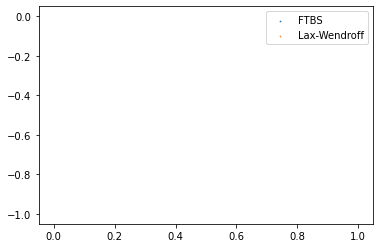

In [41]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

scat_FTBS = ax.scatter(x, u_FTBS, label="FTBS", s=0.5)
scat_LW = ax.scatter(x, u_LW, label="Lax-Wendroff", s=0.5)
# ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    # update the FTBS scatter plot:
    data = np.stack([x, num_solutions_FTBS[frame]]).T
    scat_FTBS.set_offsets(data)
    # update the LW scatter plot:
    data = np.stack([x, num_solutions_LW[frame]]).T
    scat_LW.set_offsets(data)
    return (scat_FTBS, scat_LW)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

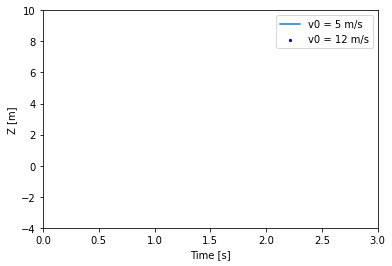

In [37]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

In [36]:
ani